In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [1]:
from sklearn import datasets

# Load the diabetes dataset

diabetes = datasets.load_diabetes()

diabetes.keys()

print(diabetes.feature_names)

diabetes.DESCR

# Note while reading the description one should find the input variable (values are already scaled) and target variable .Read the description carefully.

diabetes.data

diabetes.target

# putting the dataset in Pandas DataFrame

import pandas as pd

df =pd.DataFrame(data=diabetes.data,columns=diabetes.feature_names)

print(df)

df['DiseaseProgression']=diabetes.target

print(df)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']
          age       sex       bmi        bp        s1        s2        s3  \
0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2    0.085299  0.050680  0.044451 -0.005671 -0.045599 -0.034194 -0.032356   
3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
5   -0.092695 -0.044642 -0.040696 -0.019442 -0.068991 -0.079288  0.041277   
6   -0.045472  0.050680 -0.047163 -0.015999 -0.040096 -0.024800  0.000779   
7    0.063504  0.050680 -0.001895  0.066630  0.090620  0.108914  0.022869   
8    0.041708  0.050680  0.061696 -0.040099 -0.013953  0.006202 -0.028674   
9   -0.070900 -0.044642  0.039062 -0.033214 -0.012577 -0.034508 -0.024993   
10  -0.096328 -0.044642 -0.083808  0.008101 -0.103389 -0.090561 -0.013948   
11   0.02717

In [3]:
diabetes.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286377, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04687948,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452837, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00421986,  0.00306441]])

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [5]:
############Since the variables are already scaled, we do not need to perform any kind of transformation

df.size

4862

In [6]:
df.shape

(442, 11)

In [7]:
df['DiseaseProgression']

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
5       97.0
6      138.0
7       63.0
8      110.0
9      310.0
10     101.0
11      69.0
12     179.0
13     185.0
14     118.0
15     171.0
16     166.0
17     144.0
18      97.0
19     168.0
20      68.0
21      49.0
22      68.0
23     245.0
24     184.0
25     202.0
26     137.0
27      85.0
28     131.0
29     283.0
       ...  
412    261.0
413    113.0
414    131.0
415    174.0
416    257.0
417     55.0
418     84.0
419     42.0
420    146.0
421    212.0
422    233.0
423     91.0
424    111.0
425    152.0
426    120.0
427     67.0
428    310.0
429     94.0
430    183.0
431     66.0
432    173.0
433     72.0
434     49.0
435     64.0
436     48.0
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: DiseaseProgression, Length: 442, dtype: float64

In [12]:
df.dtypes

age                   float64
sex                   float64
bmi                   float64
bp                    float64
s1                    float64
s2                    float64
s3                    float64
s4                    float64
s5                    float64
s6                    float64
DiseaseProgression    float64
dtype: object

In [13]:
df.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,DiseaseProgression
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [14]:
df.isnull().sum()

age                   0
sex                   0
bmi                   0
bp                    0
s1                    0
s2                    0
s3                    0
s4                    0
s5                    0
s6                    0
DiseaseProgression    0
dtype: int64

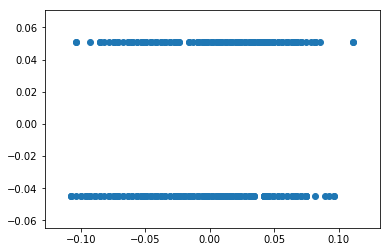

In [15]:
plt.scatter(df['age'],df['sex'])

In [16]:
df['DiseaseProgression'].describe()

count    442.000000
mean     152.133484
std       77.093005
min       25.000000
25%       87.000000
50%      140.500000
75%      211.500000
max      346.000000
Name: DiseaseProgression, dtype: float64

In [17]:
df['age'].describe()

count    4.420000e+02
mean    -3.634285e-16
std      4.761905e-02
min     -1.072256e-01
25%     -3.729927e-02
50%      5.383060e-03
75%      3.807591e-02
max      1.107267e-01
Name: age, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x99cc7b8>,
 'caps': [<matplotlib.lines.Line2D at 0x99cce48>,
 'boxes': [<matplotlib.lines.Line2D at 0x99cc3c8>],
 'medians': [<matplotlib.lines.Line2D at 0x99d9518>],
 'fliers': [<matplotlib.lines.Line2D at 0x99d9860>],
 'means': []}

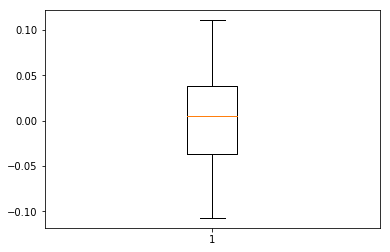

In [38]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0xc8b6358>,
 'caps': [<matplotlib.lines.Line2D at 0xc8b69e8>,
 'boxes': [<matplotlib.lines.Line2D at 0xc8acf28>],
 'medians': [<matplotlib.lines.Line2D at 0xc8b6e10>],
 'fliers': [<matplotlib.lines.Line2D at 0xc8c1400>],
 'means': []}

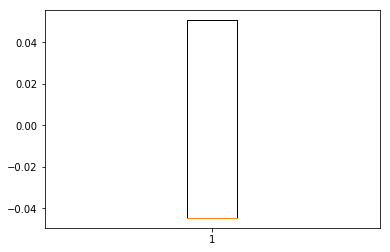

In [40]:
plt.boxplot(df['sex'])

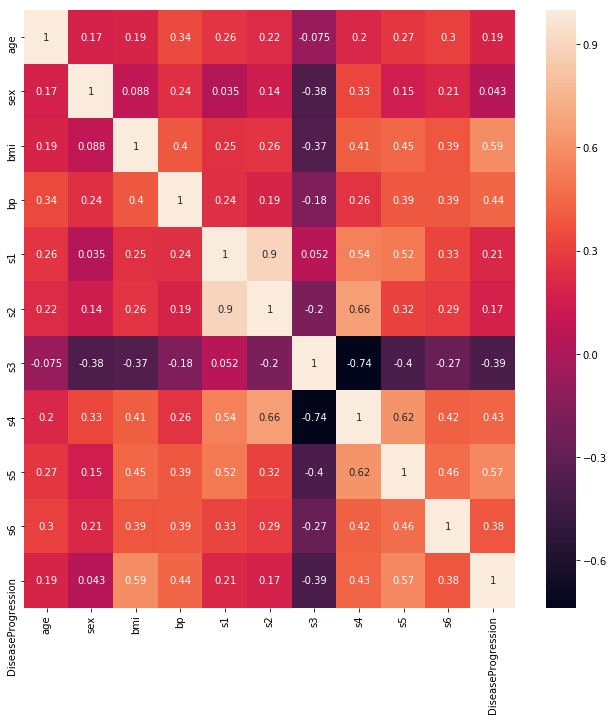

In [22]:
corr_hmap=df.corr()
plt.figure(figsize=(11,11))
sns.heatmap(corr_hmap,annot=True)
plt.show()

In [18]:
x=df.iloc[:,1:11]
y=df.iloc[:,-1]

In [19]:
x.shape

(442, 10)

In [20]:
y.shape

(442,)

In [42]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=53)

In [43]:
x_train.shape

(296, 10)

In [44]:
y_train.shape

(296,)

In [45]:
lm=LinearRegression()

In [46]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [51]:
lm.score(x_train,y_train)

1.0

In [52]:
lm.coef_

array([-1.16461606e-13, -1.03284821e-14,  3.69974857e-14,  1.82429616e-13,
       -1.94118449e-13, -1.28588608e-13,  8.87113941e-14,  3.72947880e-14,
        1.75335306e-15,  1.00000000e+00])

In [35]:
lm.intercept_

-1.1368683772161603e-13

In [53]:
lm.predict(x_test)

array([200., 124., 163., 200.,  88.,  64.,  91., 144., 138.,  84., 153.,
       233., 195.,  63., 202.,  49., 209.,  81., 178., 186., 277.,  90.,
       303., 275., 128., 332.,  91., 219., 311.,  93.,  85., 177., 310.,
       140., 306., 150., 258., 265., 152.,  78., 210.,  48.,  77., 142.,
       233.,  55.,  44., 171., 221., 178., 189.,  80., 161., 125.,  61.,
        51., 173., 156., 168., 214., 104., 178.,  59.,  78.,  83., 259.,
       131., 142., 162.,  83.,  97., 217., 261., 168.,  66., 336., 151.,
       249.,  77., 132., 242., 123.,  64., 181.,  65., 101.,  88., 175.,
       214., 154.,  68.,  57., 283.,  60., 280.,  84., 131., 248.,  72.,
       252., 281., 139.,  75.,  63.,  90.,  73., 136.,  66., 297., 145.,
        87.,  77., 235., 170., 293., 121., 281., 104., 321.,  69.,  71.,
        63.,  68.,  51., 220.,  98., 317., 111., 277.,  67.,  97., 107.,
        84., 127.,  72., 214., 220., 243., 346., 174., 200., 141., 107.,
        52., 259., 126.])

In [54]:
pred=lm.predict(x_test)

In [41]:
print("Predicted Disease Progression",pred)
print("Actual Disease Progression",y_test)

Predicted Disease Progression [ 71.  72. 235. 277. 109.  61. 109.  78.  66. 192.  52. 173.  97. 216.
  68. 232. 237.  68. 262. 116. 220.  51. 131. 195.  63. 144. 248.  71.
  52.  90. 171.  77. 198.  77. 167.  74.  72. 201. 128.  60. 257.  85.
  57. 151. 281.  84.  80. 242.  70.  53. 296. 257. 161.  59.  65. 217.
 102.  91. 261. 243. 281. 144.  92. 178. 270. 170.  71. 179.  45. 274.
 182. 178.  97.  58. 125.  67. 116. 202.  90. 281.  99. 311. 259. 283.
 168. 191. 206. 262. 155. 202.  55. 202.  42. 214. 173. 118.  90. 129.
 151. 111.  53.  85. 109. 200. 152. 252. 155. 178. 128. 258. 124. 265.
 189. 139.  70. 302.  47.  90. 200. 306.  94.  31. 272. 215. 137. 148.
 140.  99.  89. 198. 242. 200. 237. 200.  85.  54. 252.  72. 336.  53.
  96. 185.  60. 160. 275. 184.]
Actual Disease Progression 64      71.0
196     72.0
142    235.0
390    277.0
353    109.0
60      61.0
310    109.0
246     78.0
431     66.0
325    192.0
62      52.0
432    173.0
67      97.0
340    216.0
20      68.0
399   

In [55]:
print("Error")
print(mean_squared_error(y_test,pred))

Error
2.3756600192299623e-28


In [56]:
from sklearn.metrics import r2_score
print(r2_score(y_test,pred))


1.0
